In [37]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image

In [38]:
import donkeycar as dk
from donkeycar.parts.datastore import Tub

%matplotlib inline
from matplotlib.pyplot import imshow

In [39]:
t = Tub(('/home/wroscoe/data/rally/rally_A_01/'))

path_in_tub: /home/wroscoe/data/rally/rally_A_01/
Tub exists: /home/wroscoe/data/rally/rally_A_01/


In [40]:
rec = t.get_record(1)
arr = rec['cam/image_array']

In [41]:
img = Image.fromarray(arr)

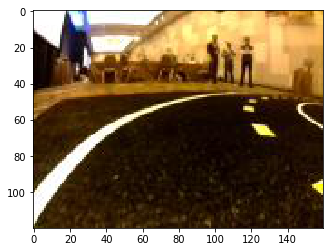

In [42]:
imshow(arr)

In [43]:
def eq_Hist(img): # Histogram normalization
    img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img

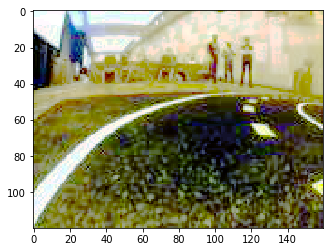

In [44]:
eq_arr = eq_Hist(arr)
imshow(eq_arr)

In [45]:
def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)
    
def lin_img(img,s=1.0,m=0.0): # Compute linear image transformation img*s+m
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

def contr_img(img, s=1.0): # Change image contrast; s>1 - increase
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

### Undistort Images

In [118]:
#camera matrix
mtx = np.array([[ 343.80057202,    0.        ,  301.73719477],
       [   0.        ,  323.1159458 ,  239.79788308],
       [   0.        ,    0.        ,    1.        ]])/4
mtx

array([[ 85.95014301,   0.        ,  75.43429869],
       [  0.        ,  80.77898645,  59.94947077],
       [  0.        ,   0.        ,   0.25      ]])

In [119]:


mtx_new = mtx.copy()
mtx_new[(0,1), (0,1)] = 0.4 * mtx_new[(0,1), (0,1)]



dist = np.array([[ -1.65260527],
                 [  5.7104838 ],
                 [-23.89860722],
                 [ 55.40237623]])
dist

array([[ -1.65260527],
       [  5.7104838 ],
       [-23.89860722],
       [ 55.40237623]])

In [140]:
def undistort(img_arr, mtx, dist):
    print(dist)
    h, w = img_arr.shape[:2]
    
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(mtx, dist, np.eye(3), mtx, (w, h), cv2.CV_16SC2)

    undistorted_img = cv2.remap(img_arr, map1, map2, interpolation=cv2.INTER_LINEAR, 
                                borderMode=cv2.BORDER_CONSTANT)

    return undistorted_img

In [141]:
#undist_arr = cv2.fisheye.undistortImage(arr, mtx, dist, new_size=(160,120))

In [142]:
dist=dist/4

undist_arr = undistort(arr, mtx, dist)

[[-0.00161387]
 [ 0.00557664]
 [-0.02333848]
 [ 0.05410388]]


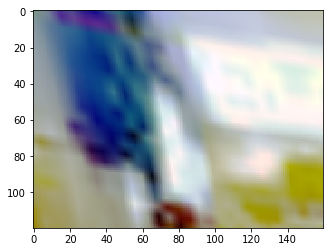

In [143]:
imshow(undist_arr)

### Transform images to birds eyey view. 